In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import pickle
from metrics import mean_Euclidean_dist, normalize
from pymoo.indicators.hv import HV
from pymoo.config import Config
Config.warnings['not_compiled'] = False
from problem import get_problem

In [7]:
color_code = ['green', 'blue']

problem_names = ['DTLZ2', 'VLMOP2', 'F2']

models = ['Trans', 'MLP']

font_size = 20

log_dir = f"logs_model"

In [8]:
def HV_compute():
    for problem_name in problem_names:

        n_dim = 6 if problem_name in ['F2', 'DTLZ2'] else 4
        
        problem = get_problem(problem_name)
        ref_point = problem.nadir_point 
        ref_point = [1.1 * x  for x in ref_point]
        hv = HV(ref_point=np.array(ref_point))
        
        for model in models:
            sol = np.load(f'{log_dir}/evaluation_{problem_name}_Y_{n_dim}_Co-PSL_{model}.npy')
            hv_result = []
            for i in range(sol.shape[0]): 
                hv_result.append(hv(sol[:i])) 
            np.save(f'{log_dir}/HV_{problem_name}_Y_{n_dim}_Co-PSL_{model}.npy', hv_result)    

/tmp/ipykernel_83917/2348764264.py:5: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=5.0)


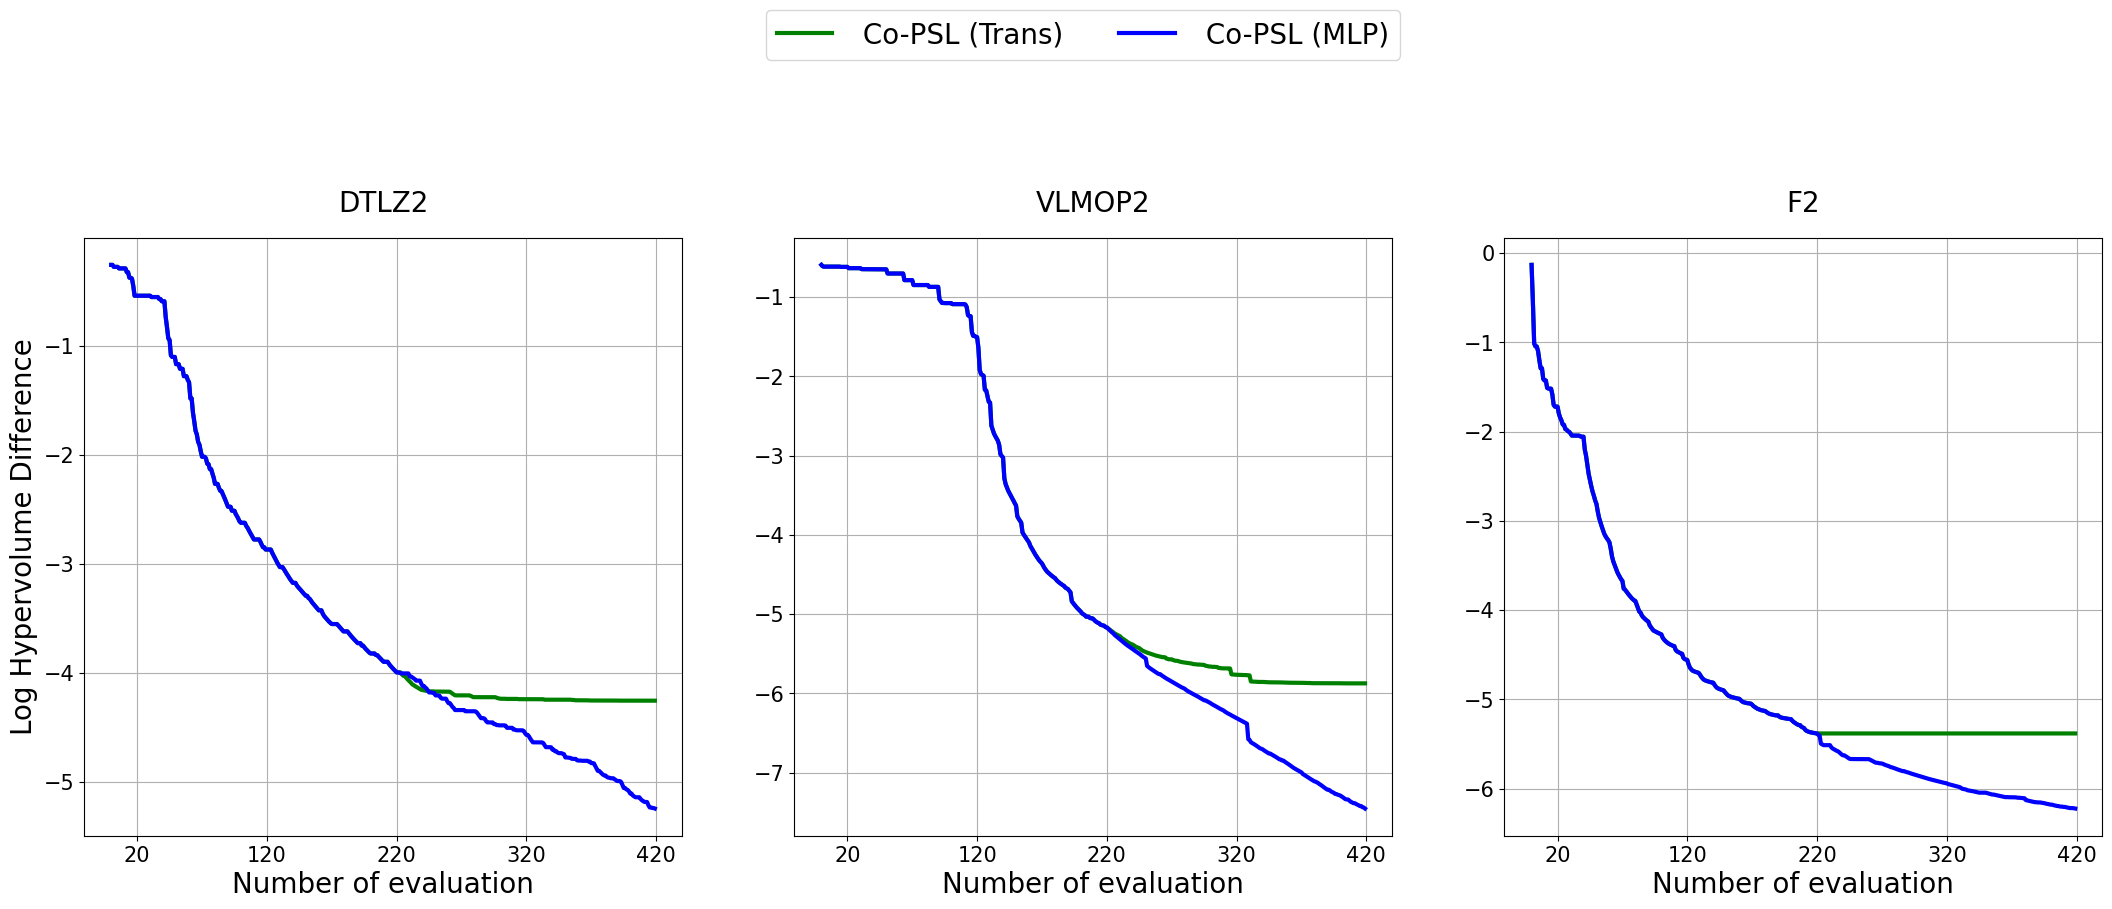

In [9]:
HV_compute()

fig, axs = plt.subplots(figsize = (22, 10), ncols = 3, nrows=1, layout="constrained")
axs = axs.flatten()
fig.tight_layout(pad=5.0)

for index, problem_name in enumerate(problem_names):
    axs[index].set_box_aspect(1)
    n_dim = 6 if problem_name in ['F2', 'DTLZ2'] else 4
    problem = get_problem(problem_name)
    
    ref_point = problem.nadir_point 
    ref_point = [1.1 * x  for x in ref_point]
    
    hv = HV(ref_point=np.array(ref_point))
    truth_pareto = np.load(f'{log_dir}/TrueParetoFront_{problem_name}.npy') 
    max_HV = hv(truth_pareto)
    
    for k, model in enumerate(models):
        hv_results = np.load(f'{log_dir}/HV_{problem_name}_Y_{n_dim}_Co-PSL_{model}.npy')
        LHV = np.log(np.clip(max_HV - hv_results, a_min=1e-14, a_max=max_HV))

    
        axs[index].plot(LHV, color=color_code[k], linewidth=3, label=f" Co-PSL ({model})" if index == 0 else "")
    
    if index in [0]:
        axs[index].set_ylabel("Log Hypervolume Difference", fontsize=font_size)
        
    x_label = [20, 120, 220, 320, 420] 
    
    axs[index].set_xlabel("Number of evaluation", fontsize=font_size)
    axs[index].set_xticks(x_label)
    axs[index].tick_params(axis='both', labelsize=font_size - 5)
    axs[index].grid()
    axs[index].set_title(f"{problem_name}", y = 1.03, fontsize=font_size)
    
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncols=4, fontsize=font_size)
plt.show()

/tmp/ipykernel_83917/820794773.py:2: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=5.0)


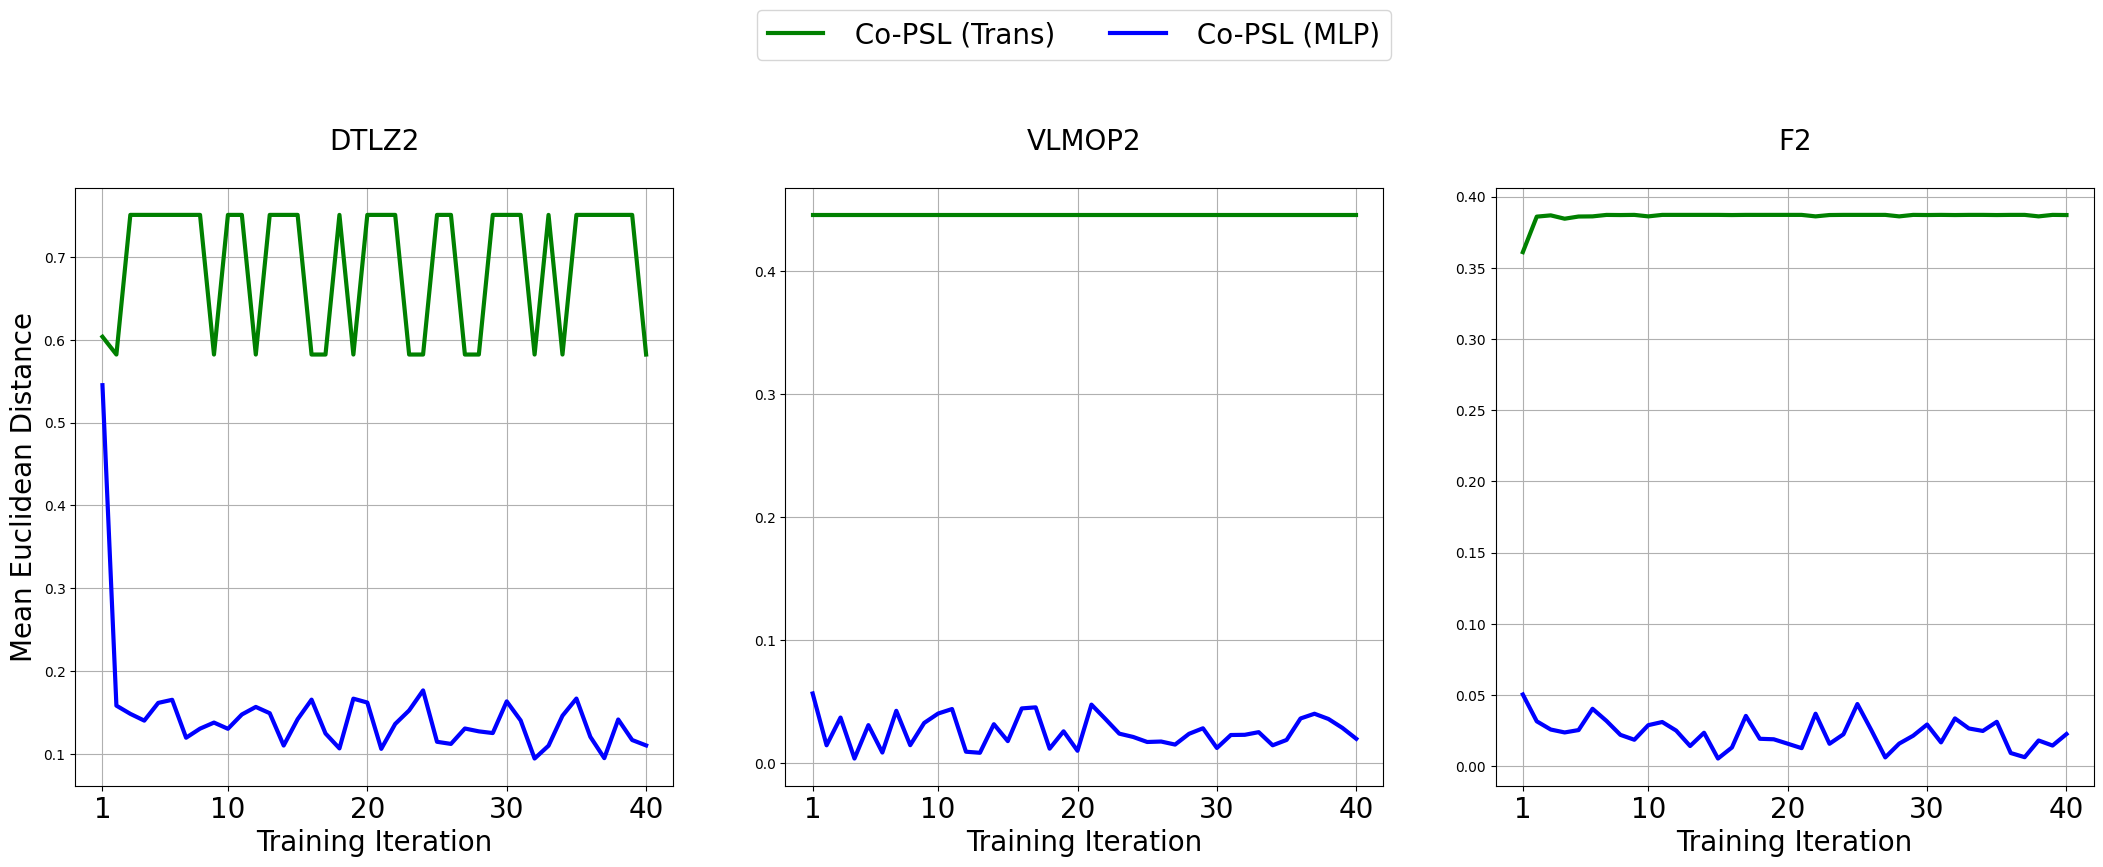

In [10]:

fig, axs = plt.subplots(figsize = (22, 10), ncols = 3, nrows=1, layout="constrained")
fig.tight_layout(pad=5.0)
axs.flatten()
for index, problem_name in enumerate(problem_names):
    n_dim = 6 if problem_name in ["DTLZ2", "F2"] else 4
    truth_front = np.load(f"logs_model/PrefParetoTruth_{problem_name}.npy")
    axs[index].set_box_aspect(1)
    
    
    for k, model in enumerate(models):
        front_Co_PSL = np.load(f"logs_model/front_{problem_name}_{n_dim}_Co-PSL_{model}.npy")
        MED_Co_PSL = []
        for i in range(40):
            MED_Co_PSL.append(mean_Euclidean_dist(truth_front, front_Co_PSL[i]))
            
        axs[index].plot(MED_Co_PSL, color=color_code[k], linewidth=3, label=f" Co-PSL ({model})" if index == 0 else "")
    if index == 0:
        axs[index].set_ylabel("Mean Euclidean Distance", fontsize = font_size)
        
    axs[index].set_xticks([0, 9, 19, 29, 39])
    axs[index].set_xticklabels([1, 10, 20, 30, 40], fontsize = font_size)
    
    axs[index].set_xlabel("Training Iteration", fontsize = font_size)
    
    axs[index].set_title(f'{problem_name}', y = 1.05, fontsize = font_size)
    axs[index].grid()
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.0), ncols=2, fontsize = font_size)
plt.show()        